In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[11.17963806]
 [-6.90352824]] 11.179638057211626


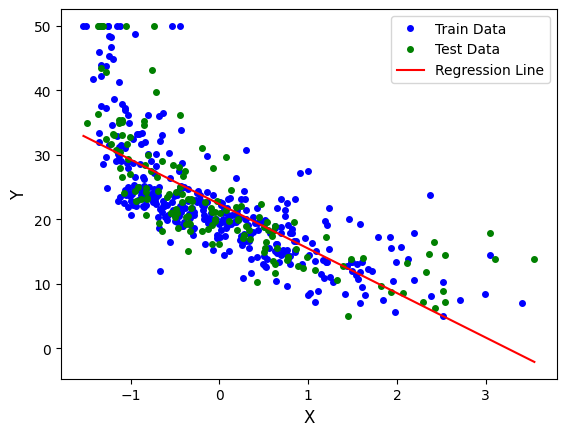

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

data = pd.read_csv('/content/drive/MyDrive/drive/boston_house_data.csv')
y = pd.read_csv('/content/drive/MyDrive/drive/boston_house_target.csv')

# 데이터 추출
X = data['12']
y = y['0'].values.reshape(-1, 1)

#정규화
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

X_norm = X_norm.values.reshape(-1, 1)
X_norm = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])

#학습 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

n = float(len(X_norm))

#경사하강법 모델(선형) and 시각화
w1 = np.zeros((X_train.shape[1], 1))
w0 = 0

lrate = 0.01
epochs = 10000

for i in range(epochs):
    y_pred = np.dot(X_train, w1) + w0
    dw1 = (1/n) * np.dot(X_train.T, (y_pred - y_train))
    dw0 = (1/n) * np.sum(y_pred - y_train)
    w1 = w1 - lrate * dw1
    w0 = w0 - lrate * dw0
print (w1, w0)

y_test_pred = np.dot(X_test, w1) + w0

plt.plot(X_train[:, 1], y_train, 'bo', markersize=4, label='Train Data')
plt.plot(X_test[:, 1], y_test, 'go', markersize=4, label='Test Data')
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
# 회귀 직선 시각화
xp = np.linspace(np.min(X_norm[:, 1]), np.max(X_norm[:, 1]), 100).reshape(-1, 1)
xp = np.hstack([np.ones((xp.shape[0], 1)), xp])  # 절편 항 추가
yp = np.dot(xp, w1) + w0
plt.plot(xp[:, 1], yp, color='red', label='Regression Line')
plt.legend()
plt.show()

In [69]:
data = pd.read_csv('/content/drive/MyDrive/drive/boston_house_data.csv')
y = pd.read_csv('/content/drive/MyDrive/drive/boston_house_target.csv')

X = data['12']
y = y['0'].values.reshape(-1, 1)

# 정규화
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

# X_norm을 2D 배열로 변환하고, 절편을 위한 1을 추가
X_norm = X_norm.values.reshape(-1, 1)
X_norm = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])

# 학습 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

# 학습 데이터에서 절편(1)을 제외한 값만 사용
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

# scikit-learn 선형 회귀 모델
clf = linear_model.LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

# 파라미터 값 출력
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
print(f'학습된 파라미터: w0 = {w0}, w1 = {w1}')

# 예측
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# 학습 데이터 시각화
plt.figure(figsize=(8, 5))
plt.plot(X_train, y_train, 'bo', markersize=4, label='Train Data')
plt.plot(X_train, y_train_pred, 'r-', label='Regression Line')
plt.title('Linear Regression (Training Data)')
plt.xlabel('Normalized Feature (X12)')
plt.ylabel('Target (Price)')
plt.legend(loc=1)
plt.grid(True)
plt.show()

# 테스트 데이터 시각화
plt.figure(figsize=(8, 5))
plt.plot(X_test, y_test, 'go', markersize=4, label='Test Data')
plt.plot(X_test, y_test_pred, 'r-', label='Regression Line')
plt.title('Linear Regression (Test Data)')
plt.xlabel('Normalized Feature (X12)')
plt.ylabel('Target (Price)')
plt.legend(loc=1)
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [47]:
data = pd.read_csv('/content/drive/MyDrive/drive/boston_house_data.csv')
y = pd.read_csv('/content/drive/MyDrive/drive/boston_house_target.csv')

# 데이터 추출
X = data['12']
y = y['0'].values.reshape(-1, 1)

# 정규화
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

X_norm = X_norm.values.reshape(-1, 1)
X_norm = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])

# 학습 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

# 로지스틱 회귀 모델 훈련
clf = linear_model.LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train.ravel())

w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize = (6, 4))
plt.plot(X[C1,0], X[C1,1], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,0], X[C0,1], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

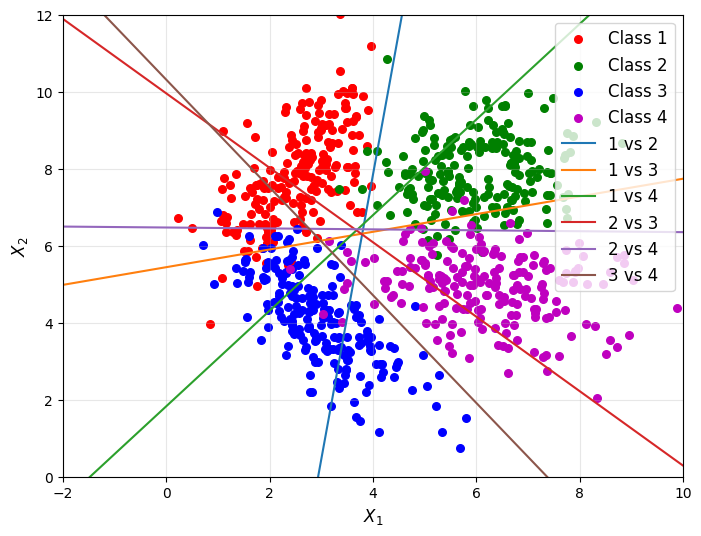

In [60]:

data = pd.read_csv('/content/drive/MyDrive/drive/multivariate_data.csv')

# 데이터 추출
Class1 = data[['C1_X1', 'C1_X2']].values
Class2 = data[['C2_X1', 'C2_X2']].values
Class3 = data[['C3_X1', 'C3_X2']].values
Class4 = data[['C4_X1', 'C4_X2']].values


y1 = 1 * np.ones([len(Class1), 1])
y2 = 2 * np.ones([len(Class2), 1])
y3 = 3 * np.ones([len(Class3), 1])
y4 = 4 * np.ones([len(Class4), 1])

# sklearn 함수 적용
clf12 = linear_model.LogisticRegression(solver='lbfgs')
clf12.fit(np.vstack([Class1, Class2]), np.vstack([y1, y2]))

clf13 = linear_model.LogisticRegression(solver='lbfgs')
clf13.fit(np.vstack([Class1, Class3]), np.vstack([y1, y3]))

clf14 = linear_model.LogisticRegression(solver='lbfgs')
clf14.fit(np.vstack([Class1, Class4]), np.vstack([y1, y4]))

clf23 = linear_model.LogisticRegression(solver='lbfgs')
clf23.fit(np.vstack([Class2, Class3]), np.vstack([y2, y3]))

clf24 = linear_model.LogisticRegression(solver='lbfgs')
clf24.fit(np.vstack([Class2, Class4]), np.vstack([y2, y4]))

clf34 = linear_model.LogisticRegression(solver='lbfgs')
clf34.fit(np.vstack([Class3, Class4]), np.vstack([y3, y4]))

# 결정 경계 계산
def plot_decision_boundary(clf, X, ax, label):
    xp = np.linspace(-2, 10, 100).reshape(-1, 1)
    yp = - clf.coef_[0, 0] / clf.coef_[0, 1] * xp - clf.intercept_ / clf.coef_[0, 1]
    ax.plot(xp, yp, label=label)


plt.figure(figsize=(8, 6))
plt.scatter(Class1[:, 0], Class1[:, 1], c='r', label='Class 1', s=30)
plt.scatter(Class2[:, 0], Class2[:, 1], c='g', label='Class 2', s=30)
plt.scatter(Class3[:, 0], Class3[:, 1], c='b', label='Class 3', s=30)
plt.scatter(Class4[:, 0], Class4[:, 1], c='m', label='Class 4', s=30)

plot_decision_boundary(clf12, np.vstack([Class1, Class2]), plt.gca(), label='1 vs 2')
plot_decision_boundary(clf13, np.vstack([Class1, Class3]), plt.gca(), label='1 vs 3')
plot_decision_boundary(clf14, np.vstack([Class1, Class4]), plt.gca(), label='1 vs 4')
plot_decision_boundary(clf23, np.vstack([Class2, Class3]), plt.gca(), label='2 vs 3')
plot_decision_boundary(clf24, np.vstack([Class2, Class4]), plt.gca(), label='2 vs 4')
plot_decision_boundary(clf34, np.vstack([Class3, Class4]), plt.gca(), label='3 vs 4')

# 레이블, 타이틀, 축 설정
plt.xlabel('$X_1$', fontsize=12)
plt.ylabel('$X_2$', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim([-2, 10])
plt.ylim([0, 12])
plt.show()

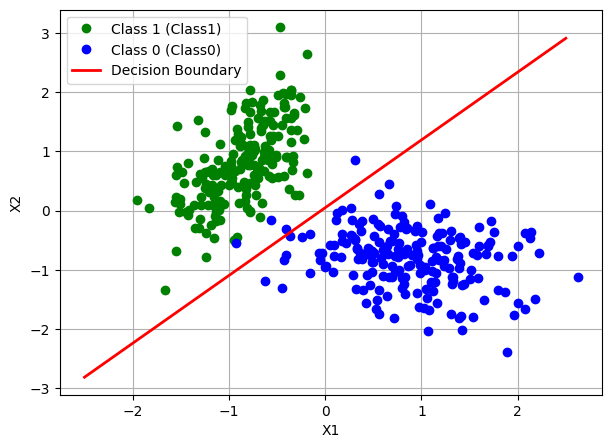

In [63]:
data = pd.read_csv('/content/drive/MyDrive/drive/multivariate_data.csv')

Class1 = data[['C1_X1', 'C1_X2']].values
Class0 = data[['C4_X1', 'C4_X2']].values


y1 = np.ones((Class1.shape[0], 1))
y0 = np.zeros((Class0.shape[0], 1))


X = np.vstack([Class1, Class0])
y = np.vstack([y1, y0])


X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std


X_aug = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def h(X, w):
    return sigmoid(X @ w)

#
def compute_cost(X, y, w):
    m = len(y)
    h_val = h(X, w)
    cost = -1/m * np.sum(y * np.log(h_val + 1e-10) + (1 - y) * np.log(1 - h_val + 1e-10))
    return cost


w = np.zeros([3, 1])
alpha = 0.0001
for i in range(100000):
    grad = -X_aug.T @ (y - h(X_aug, w)) / len(y)
    w -= alpha * grad


x_vals = np.linspace(-2.5, 2.5, 100)
w0, w1, w2 = w[0, 0], w[1, 0], w[2, 0]
y_vals = -(w1 / w2) * x_vals - (w0 / w2)

# 11. 시각화 (plot 사용)
plt.figure(figsize=(7, 5))
plt.plot(X_norm[y.ravel() == 1][:, 0], X_norm[y.ravel() == 1][:, 1], 'go', label='Class 1 (Class1)')
plt.plot(X_norm[y.ravel() == 0][:, 0], X_norm[y.ravel() == 0][:, 1], 'bo', label='Class 0 (Class0)')
plt.plot(x_vals, y_vals, 'r-', label='Decision Boundary', linewidth=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()
plt.show()